<a href="https://colab.research.google.com/github/deeplearningnapratica/transformar_foto_em_cartoon/blob/master/Transformar_Foto_em_Cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cartoonize-se!!**

Algoritmo incrível que transforma qualquer foto em Cartoon! Será que os seus vão ficar iquais aos da disney?
--------

**Veja o tutorial no youtube:** https://www.youtube.com/c/DeepLearningnaPratica
----------





Primeiros passos:

Configurar o ambiente de execução:

**1) Verifique se o TensorFlow está disponível:**

In [ ]:
%tensorflow_version 1.x

**2) Baixe o código que usa a StyleGan para criar a animação.** Não faz idéia do que é? conheça nosso canal no youtube para aprender mais (https://www.youtube.com/watch?v=-zESs_9igrg) ou simplesmente ignore e siga os próximos passos.

In [ ]:
!git clone https://github.com/justinpinkney/stylegan2
%cd stylegan2
!nvcc test_nvcc.cu -o test_nvcc -run

Cloning into 'stylegan2'...
remote: Enumerating objects: 269, done.
remote: Total 269 (delta 0), reused 0 (delta 0), pack-reused 269
Receiving objects: 100% (269/269), 2.31 MiB | 4.29 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/stylegan2
CPU says hello.
GPU says hello.


Crie os diretórios de trabalho neceessários.

In [ ]:
!mkdir raw
!mkdir aligned
!mkdir generated

**3) Agora vamos carregar suas fotos**

Suas fotos devem ser carregadas para pasta `raw/`. Não se preocupe com o formato da imagem, usaremos um detector de rosto para pegar a posição e transforma-las no formato correto. Você precisará de uma imagem de rosto em alta resolução para obter um resultado nítido.

Vamos pegar uma imagem de exemplo da Internet para trabalhar. O que acham do Bolsonaro?

Aqui vamos carregar as imagens da internet (vc pode alterar o código para pegar de qualquer lugar que desejar):

In [ ]:
!wget https://img.r7.com/images/jair-bolsonaro-25092020111107804?dimensions=660x360 -O raw/example.jpg

--2020-09-27 19:02:09--  https://img.r7.com/images/jair-bolsonaro-25092020111107804?dimensions=660x360
Resolving img.r7.com (img.r7.com)... 23.215.52.231
Connecting to img.r7.com (img.r7.com)|23.215.52.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50239 (49K) [image/jpeg]
Saving to: ‘raw/example.jpg’

raw/example.jpg     100%[===================>]  49.06K  --.-KB/s    in 0.01s   

2020-09-27 19:02:09 (3.39 MB/s) - ‘raw/example.jpg’ saved [50239/50239]



**4) Agora vamos preparar a(s) imagem(ns) no formato correto (chamamos de alinhar).** Rode os 2 próximos blocos:

*Pode demorar um pouco para terminar...*

In [ ]:
import pretrained_networks

# use my copy of the blended model to save Doron's download bandwidth
# get the original here https://mega.nz/folder/OtllzJwa#C947mCCdEfMCRTWnDcs4qw
blended_url = "https://drive.google.com/uc?id=1H73TfV5gQ9ot7slSed_l-lim9X7pMRiU" 
ffhq_url = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"

_, _, Gs_blended = pretrained_networks.load_networks(blended_url)
_, _, Gs = pretrained_networks.load_networks(ffhq_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [ ]:
!python align_images.py raw aligned

64045056/64040097 [==============================] - 8s 0us/step


**5) Estamos quase lá, agora vamos definir o que seriam as projeções das imagens.**
*Calma, esta etapa pode demorar bastante...*

In [ ]:
!python project_images.py --num-steps 500 aligned generated

Loading networks from "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Loading images from ".stylegan2-tmp/dataset/images"
detected 1 images ...
Creating dataset ".stylegan2-tmp/dataset/tfrecords"
Adding the images to tfrecords ...
added images 0
Added 1 images.
Projecting image "example_01.png"...


**6) Finalmente, vamos gerar nossos Cartoons!!!**

In [ ]:
import numpy as np
from PIL import Image
import dnnlib
import dnnlib.tflib as tflib
from pathlib import Path

latent_dir = Path("generated")
latents = latent_dir.glob("*.npy")
for latent_file in latents:
  latent = np.load(latent_file)
  latent = np.expand_dims(latent,axis=0)
  synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
  images = Gs_blended.components.synthesis.run(latent, randomize_noise=False, **synthesis_kwargs)
  Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').save(latent_file.parent / (f"{latent_file.stem}-toon.jpg"))


**7) Agora é só mostrar eles na tela e baixar para tirar onda na internet:**

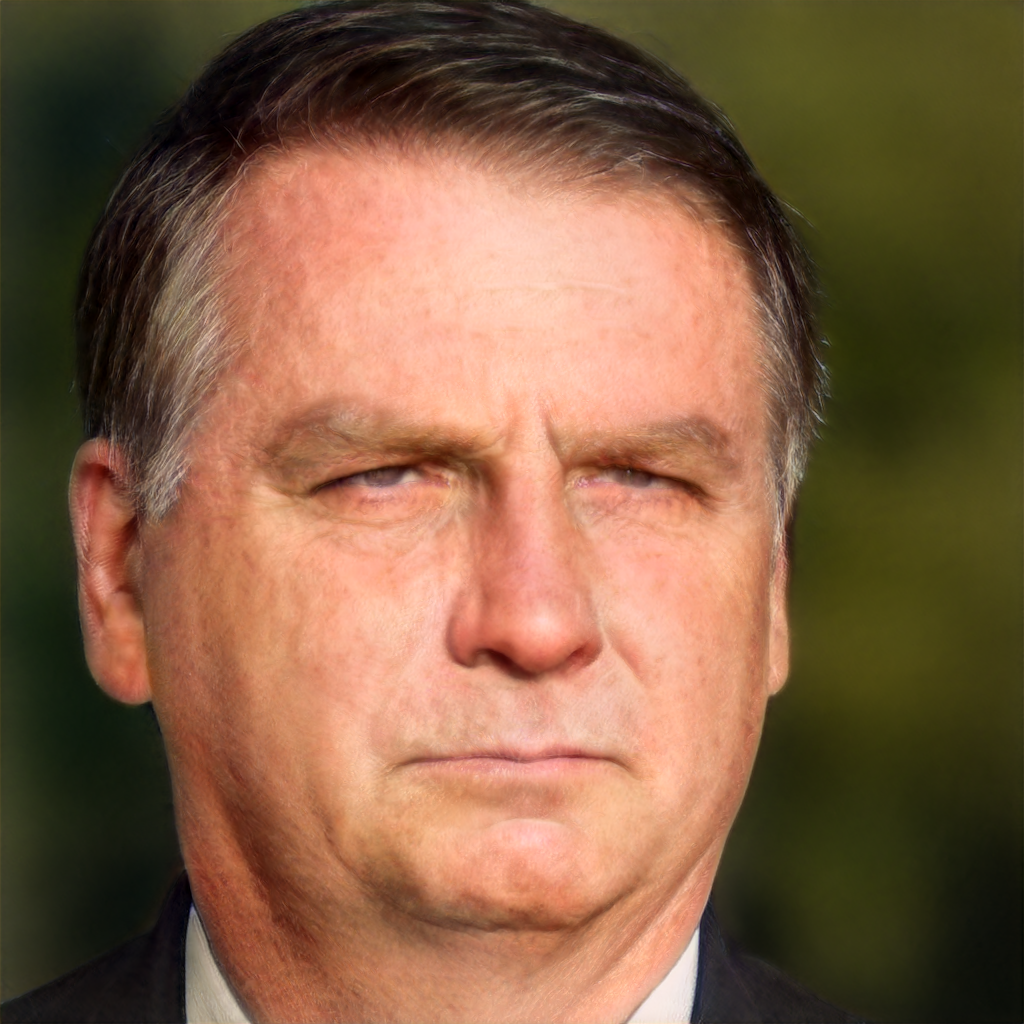

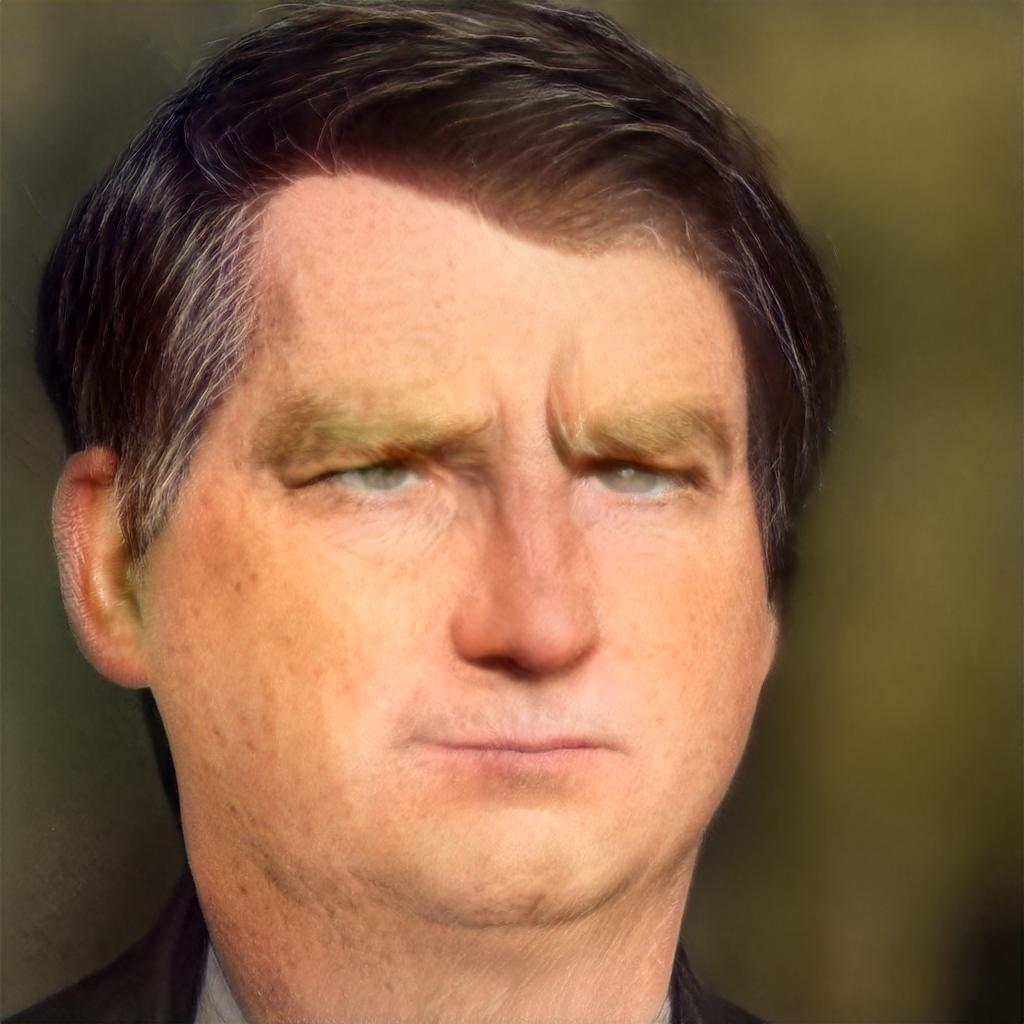

In [ ]:
from IPython.display import Image 
embedded = Image(filename="generated/example_01.png", width=256)
display(embedded)
tooned = Image(filename="generated/example_01-toon.jpg", width=256)
display(tooned)

Espero que tenham gostado. 

Um tutorial destes merece um incentivo? Entra lá e assina nosso canal do youtube: https://www.youtube.com/c/DeepLearningnaPratica 

Participe da comunidade: https://napratica.net (troque informações, arquivos e tire dúvidas).

Quer saber mais? Montamos um treinamento completo de DeepFake e Inteligência Artificial aplicada ao processamento de vídeos. Conheça em: 
https://www.cursodeepfake.com.br/ 

Me segue no github: 
https://github.com/deeplearningnapratica